In [1]:
#Ejemplos comunes donde utilizar python es demasiado util
import os 
# Aplicación
carpeta = "basesDeDatos"
ruta = "C:/Users/Janus/Documents/Jorge_uni/trabajo/Clases_Python/"+carpeta

#Crear carpeta
if not os.path.exists(ruta):
    os.mkdir(ruta)
    print(f"La carpeta {carpeta} se ha creado correctamente.")
else:
    print(f"La carpeta {carpeta} no se ha creado.")

La carpeta basesDeDatos se ha creado correctamente.


In [11]:
#Crear una base de datos con datos aleatorios:
import csv
import random
from faker import Faker

# Configuración del faker
faker = Faker()

# Definición de los encabezados de las columnas
headers = ["Nombre", "Sexo", "Cargo", "Ingresos", "Ubicación", "Edad"]

# Generación de los datos aleatorios
data = []
for i in range(500000):
    # Generación de datos aleatorios
    nombre = faker.name()
    sexo = random.choice(["M", "F"])
    cargo = faker.job()
    ubicacion = faker.city()
    edad = random.randint(18, 65)
    if sexo == "M":
        ingresos=round(random.uniform(20000, 80000), 2)
    else:
        ingresos = round(random.uniform(30000, 100000), 2)

    # Agregamos los datos a la lista
    data.append([nombre, sexo, cargo, ingresos, ubicacion, edad])

#Seleccionar carpeta
carpeta = "BasesDeDatos"

# Escritura de los datos en el archivo CSV
archivo = os.path.join(carpeta, "BasesDeDatos.csv")
with open(archivo, mode="w", newline="") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerow(headers)
    for row in data:
        writer.writerow(row)
print("La base de datos ha sido generada exitosamente.")

La base de datos ha sido generada exitosamente.


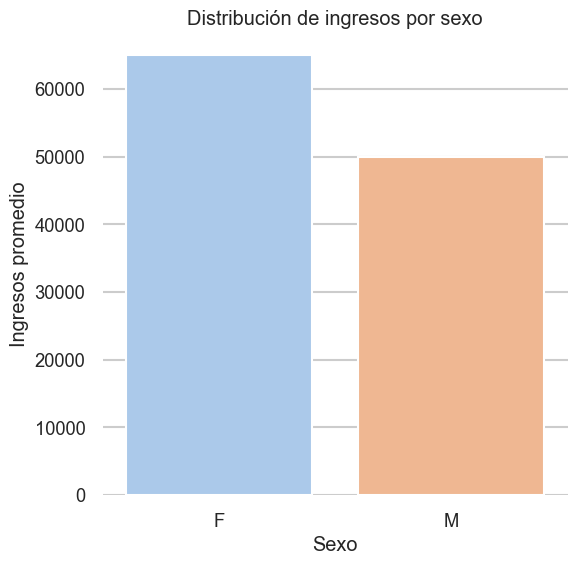

In [12]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

# Leer la base de datos
archivo = os.path.join("basesDeDatos", "BasesDeDatos.csv")
df = pd.read_csv(archivo, encoding="ISO-8859-1")

# Calcular la media de ingresos por sexo
ingresos_por_sexo = df.groupby("Sexo")["Ingresos"].mean()

# Crear la gráfica
sns.set_style("whitegrid")
sns.barplot(x=ingresos_por_sexo.index, y=ingresos_por_sexo.values)
sns.despine(left=True, bottom=True)
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("talk", font_scale=0.8)
sns.set_palette("pastel")

# Agregar título y etiquetas
plt.title("Distribución de ingresos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Ingresos promedio")

# Guardar la imagen en la carpeta
carpeta = "basesDeDatos"
nombre_archivo = "distribucion_ingresos.png"
ruta_archivo = os.path.join(carpeta, nombre_archivo)
plt.savefig(ruta_archivo, dpi=300)

# Mostrar la gráfica
plt.show()


In [13]:
import pandas as pd
import statsmodels.api as sm
import os

# Leer la base de datos
archivo = os.path.join("basesDeDatos", "BasesDeDatos.csv")
df = pd.read_csv(archivo, encoding="ISO-8859-1")

# Codificar la variable categórica Sexo
df["Sexo_cod"] = pd.Categorical(df["Sexo"]).codes

# Definir las variables independiente y dependiente
X = df[["Sexo_cod"]]
Y = df["Ingresos"]

# Añadir una columna de unos para la constante
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(Y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:               Ingresos   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                 7.973e+04
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:40   Log-Likelihood:            -5.6307e+06
No. Observations:              500000   AIC:                         1.126e+07
Df Residuals:                  499998   BIC:                         1.126e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         6.5e+04     37.553   1730.866      0.0

In [4]:
import pandas as pd

# Leer el archivo CSV generado anteriormente
data = pd.read_csv("./basesDeDatos/BasesDeDatos.csv", encoding="ISO-8859-1")

# Calcular el promedio de ingresos para hombres y mujeres por ubicación
mean_by_sex_location = data.groupby(["Ubicación", "Sexo"])["Ingresos"].mean()

# Mostrar los resultados
print(mean_by_sex_location)

Ubicación     Sexo
Aaronberg     F       81372.753333
              M       57218.906250
Aaronborough  F       56797.409286
              M       50689.971000
Aaronburgh    F       61627.791579
                          ...     
Zunigaside    M       47509.710000
Zunigastad    M       42939.300000
Zunigaton     F       31243.670000
Zunigatown    F       79640.010000
Zunigaview    M       49390.230000
Name: Ingresos, Length: 118605, dtype: float64


In [9]:
import csv
import random
from datetime import datetime, timedelta

# Crear una lista de fechas que cubra 10 años
inicio = datetime(2012, 1, 1)
fechas = [inicio + timedelta(days=d) for d in range(3652)]

# Generar datos aleatorios para el precio de la acción
precio_actual = 100.0
volatilidad_diaria = 0.01
precio_min = 50.0
precio_max = 150.0

# Escribir los datos en un archivo CSV
with open("acciones.csv", "w", newline="") as archivo:
    escritor_csv = csv.writer(archivo)

    # Escribir el encabezado del archivo CSV
    escritor_csv.writerow(["Fecha", "Precio"])

    # Generar los datos aleatorios para cada día y escribirlos en el archivo CSV
    for fecha in fechas:
        precio_actual *= 1.0 + random.uniform(-volatilidad_diaria, volatilidad_diaria)
        precio_actual = max(precio_actual, precio_min)
        precio_actual = min(precio_actual, precio_max)
        escritor_csv.writerow([fecha.strftime("%Y-%m-%d"), precio_actual])

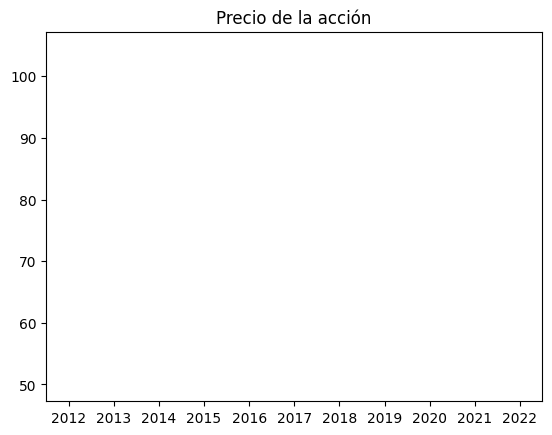

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Leer los datos del archivo CSV
datos = pd.read_csv("acciones.csv", parse_dates=["Fecha"])

# Crear la figura y el eje
fig, ax = plt.subplots()

# Función que actualiza la gráfica en cada frame de la animación
def actualizar(frame):
    datos_frame = datos[:frame]
    ax.clear()
    ax.plot(datos_frame["Fecha"], datos_frame["Precio"])
    ax.set_title("Precio de la acción")

# Crear la animación y guardarla en un archivo GIF
animacion = animation.FuncAnimation(fig, actualizar, frames=len(datos), interval=50)
animacion.save("accion.gif", writer="pillow")
